In [2]:
# from google.colab import files
# uploaded = files.upload()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

file_path = "hmnist_28_28_RGB.csv"
df = pd.read_csv(file_path)
meta_data = pd.read_csv("HAM10000_metadata.csv")
labels = meta_data['dx'].isin(['bcc', 'mel', 'akiec'])
image_name = meta_data['image_id']

df_without_label = df.drop(columns=['label'])
# print(f"{df_without_label=}")

pixel_columns = df_without_label.columns
# print(f"{pixel_columns=}")

print("Cancer Instances:",sum(labels==True))
print("Non-Cancer Instances:",sum(labels==False))
# meta_data

Cancer Instances: 1954
Non-Cancer Instances: 8061


[9810 9647 9866  399 4155 2368 4887 1146 7162]


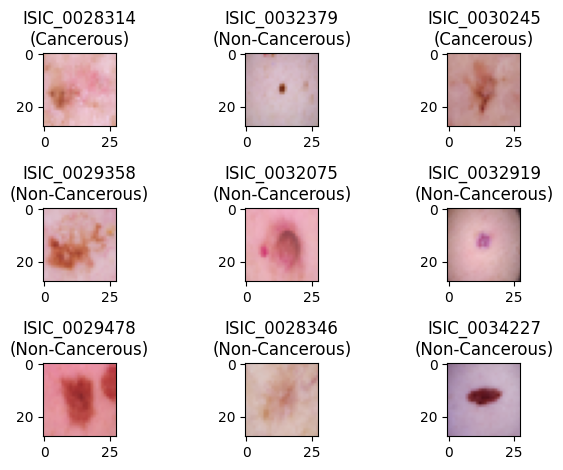

In [4]:
rows = 3
cols = 3
plotNo = 0


def plotImage(index):
    global plotNo
    plt.subplot(rows, cols, plotNo+1)
    value = df_without_label[pixel_columns][index:index+1].values[0]

    red_values = (value[0:2352:3]).reshape(28, 28)
    green_values = value[1:2352:3].reshape(28, 28)
    blue_values = value[2:2352:3].reshape(28, 28)

    rgb_image = np.stack([red_values, green_values, blue_values], axis=-1)

    plt.title(f"{image_name[index]}\n({'Cancerous' if labels[index] else 'Non-Cancerous'})")
    plt.imshow(rgb_image)
    plotNo += 1


stratified_splitter = StratifiedShuffleSplit(
    n_splits=1, test_size=9, random_state=56)

for train_index, test_index in stratified_splitter.split(df_without_label, labels):
    print(f"{test_index}")
    for index in test_index:
        plotImage(index)

plt.tight_layout()
plt.show()


In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split

model = svm.SVC()
for train_index, test_index in StratifiedShuffleSplit(n_splits=1,
    test_size=0.2, random_state=56).split(df_without_label, labels):
    print(f"{train_index=}")
    print(f"{test_index=}")
    X_train, X_test, y_train, y_test = df_without_label.iloc[train_index], df_without_label.iloc[test_index], labels[train_index], labels[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test)
    print(f"{accuracy=}")

train_index=array([2827,  203, 2613, ..., 2287, 4942, 4079], dtype=int64)
test_index=array([2376, 7742, 1896, ..., 5367, 2466, 7142], dtype=int64)
accuracy=0.8217673489765353
